In [2]:
import matplotlib
matplotlib.__version__


'1.5.0'

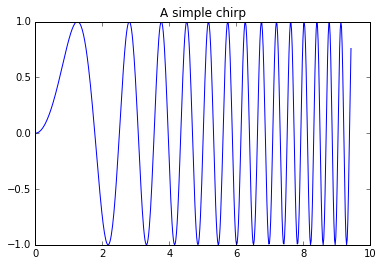

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2))
plt.title('A simple chirp')
plt.show()

In [3]:
from pyspark import SparkContext 
sc.stop()
sc = SparkContext()

In [3]:
numPartitions = 3
baseDir = os.path.join('hdfs://ns372208.ip-91-121-199.eu/extract')
TwoMonthFilename = os.path.join(baseDir, 'extract08-08_10-08.tsv')

rawRatings = sc.textFile(TwoMonthFilename).repartition(numPartitions)

In [2]:
numPartitions = 3
baseDir = os.path.join('hdfs://ns372208.ip-91-121-199.eu/extract')
TwoMonthFilename = os.path.join(baseDir, 'extract08-26_09-16.tsv')

rawRatings = sc.textFile(TwoMonthFilename).repartition(numPartitions)

In [4]:

rawRatings.take(5)

[u'5613c0180cf2d9af0cc18cdd\t5613c0180cf2d9af0cc18cdc\tTue Oct 06 2015 14:52:12 GMT+0200 (CEST)\t2501\t10\taccess offer page\tSMARTPHONE NOKIA LUMIA 635 NOIR',
 u'5614dd2d0cf2947d818c8692\t5614dd2d0cf2947d818c8691\tWed Oct 07 2015 10:51:57 GMT+0200 (CEST)\t108823\t10\taccess offer page\tSMARTPHONE SAMSUNG Galaxy Pocket 2 noir',
 u'5614dd2d0cf2947d818c8692\t5614dd2d0cf2947d818c8691\tWed Oct 07 2015 10:55:37 GMT+0200 (CEST)\t15793\t10\taccess offer page\tSMARTPHONE SAMSUNG Galaxy Pocket 2 noir',
 u'5611af150cf202afa32950af\t5611af150cf202afa32950ae\tMon Oct 05 2015 00:58:29 GMT+0200 (CEST)\t0\t10\taccess offer page\tCable Usb / Micro Usb 2.0 EXEL M11-6',
 u'5616c9cb0cf2449610ab6ede\t5616c9cb0cf2449610ab6edd\tThu Oct 08 2015 21:53:47 GMT+0200 (CEST)\t53289\t10\taccess offer page\tSMARTPHONE SAMSUNG Galaxy Pocket 2 noir']

In [5]:
logs = rawRatings.map(lambda line: line.split('\t')).cache()

In [6]:
logs.take(3)

[[u'55efd8690cf2bf3f9affb189',
  u'55efd8690cf2bf3f9affb188',
  u'Wed Sep 09 2015 08:57:51 GMT+0200 (CEST)',
  u'11369',
  u'10',
  u'access offer page',
  u'SMARTPHONE NOKIA LUMIA 635 NOIR'],
 [u'55efd8630cf2ccb32c72395e',
  u'55efd8630cf2ccb32c72395d',
  u'Wed Sep 09 2015 08:57:39 GMT+0200 (CEST)',
  u'0',
  u'10',
  u'access offer page',
  u'T\xc9L\xc9VISEUR LED INCURV\xc9 48" (pouces) SAMSUNG UE48J6300'],
 [u'5605159c0cf229cd083a9a15',
  u'5605159c0cf229cd083a9a14',
  u'Fri Sep 25 2015 11:36:28 GMT+0200 (CEST)',
  u'11815',
  u'10',
  u'access offer page',
  u'Ordinateur Portable 11,6" (Pouces) et Smartphone ACER ES1-131 + Liquid M220']]

In [ ]:
###### BROUILLON PYTHON ##########################################
textFile.filter(line => line.contains("Spark")).count() 


In [9]:
categoryLabelList = (logs
                  .map(lambda (a,b,c,d,e,f,g) : g[:10])
                  .distinct()
                  .collect()
                  )
print categoryLabelList

actionTypeList = (logs
                  .map(lambda (a,b,c,d,e,f,g) : f)
                  .distinct()
                  .collect()
                  )
print actionTypeList

[u'SMARTPHONE', u'Cartouche ', u'\xc9CRAN 24" ', u'3\u0414 \u041b\u0415\u0414 \u0422\u0412 ', u'Home Cinem', u'Micro Chai', u'HP Slimlin', u'iPad Air 9', u'\xc9TUI CLAVI', u'BARRE SON ', u'iPhone 6 P', u'Support Un', u'ACCESSOIRE', u'\xc9CRAN PC 1', u'\xc9COUTEUR /', u'OBJECTIF S', u'MONTRE CON', u'Cable Tv E', u'Oreillette', u'Sac \xc0 Dos ', u'TNT decode', u'KARAOK\xc9 PO', u'MULTIFUNCT', u'CL\xc9 USB TR', u"Capteur D'", u'TV LED 22 ', u'NIKON D320', u'TV LED 42 ', u'Laptop 11.', u'TABLETTE T', u'HOME CIN\xc9M', u'Cl\xe9 Usb EM', u"KIT D'ACCE", u'PACK JEUX ', u'ETUI DE PR', u'R\xe9p\xe9teur U', u'Cable Hdmi', u'Stylet TRU', u'GPS TOM TO', u'\xc9tui de pr', u'tablette t', u'Cl\xe9 Usb HD', u'T\xe9l\xe9phone ', u'CLAVIER GA', u'CAM\xc9RA SPO', u'LED TV 49 ', u'Laptop 17.', u'CLAVIER LO', u'RADIO R\xc9VE', u'PC TOUT EN', u'TRAQUEUR D', u'BRACELET C', u'CARTE MEMO', u'GPS MAPPY ', u'Home Cin\xe9m', u'Cardiofr\xe9q', u'H\xedbrido 2 ', u'Cl\xe9 Usb VE', u'PACK SACOC', u'PACK PROTE', u'iPho

In [15]:
cartLogs = (logs 
            .filter(lambda x : x[5] in ('remove from cart','add to cart'))
            .cache()
           )
accessOfferLogs = (logs 
            .filter(lambda x : x[5] in ('access offer page'))
            .cache()
           )
oddLogs = (logs 
            .filter(lambda x : x[5] in ('userActionLabel'))
            .cache()
           )

print cartLogs.take(3)
print accessOfferLogs.take(3)
print oddLogs.take(3)

[[u'55e8794d0cf2984be55ee596', u'55e8794d0cf2984be55ee595', u'Thu Sep 03 2015 18:47:20 GMT+0200 (CEST)', u'0', u'3', u'add to cart', u'Ordinateur Portable 15,6" (Pouces) ACER ASPIRE E5-531-C5A5'], [u'55efd8300cf2bf3f9affb13d', u'55efd8300cf2bf3f9affb13c', u'Wed Sep 09 2015 08:57:45 GMT+0200 (CEST)', u'0', u'3', u'add to cart', u'T\xc9L\xc9VISEUR LED 39" (pouces) TUCSON TL39505DLED15'], [u'55eda90c0cf26fa8c8c3190b', u'55eda90c0cf26fa8c8c3190a', u'Mon Sep 07 2015 17:12:42 GMT+0200 (CEST)', u'0', u'3', u'add to cart', u'LECTEUR DVD + DVD INVICTUS TAKARA KDV 103 WPKI']]
[[u'55efd8690cf2bf3f9affb189', u'55efd8690cf2bf3f9affb188', u'Wed Sep 09 2015 08:57:51 GMT+0200 (CEST)', u'11369', u'10', u'access offer page', u'SMARTPHONE NOKIA LUMIA 635 NOIR'], [u'55efd8630cf2ccb32c72395e', u'55efd8630cf2ccb32c72395d', u'Wed Sep 09 2015 08:57:39 GMT+0200 (CEST)', u'0', u'10', u'access offer page', u'T\xc9L\xc9VISEUR LED INCURV\xc9 48" (pouces) SAMSUNG UE48J6300'], [u'5605159c0cf229cd083a9a15', u'5605159

In [9]:
userAgregLogs.unpersist()

PythonRDD[12] at RDD at PythonRDD.scala:43

In [20]:
def returnMeANumber(string):
    if string.isdigit():
        return int(string)
    else:
        return 0
    
def sumDurationAndCountForTuples(tuple1,tuple2):
    """ Calculate average rating
    Args:
        IDandRatingsTuple: a single tuple of (MovieID, (Rating1, Rating2, Rating3, ...))
    Returns:
        tuple: a tuple of (MovieID, (number of ratings, averageRating))
    """
    return (int(tuple1[0])+int(tuple2[0]),tuple1[1]+tuple2[1] )

In [21]:
userSmartphoneAgregLogs = (logs
                         .filter(lambda (k,a,b,c,d,e,f) : d == '10')
                         .map(lambda (k,a,b,c,d,e,f):((k,e,f),(returnMeANumber(c),1)))
                         .reduceByKey(sumDurationAndCountForTuples)
                         .cache()
                         )

In [17]:
cAddToCart = cartLogs.filter(lambda x : x[5] == 'add to cart').count()
cRemoveFromCart = cartLogs.filter(lambda x : x[5] == 'remove from cart').count()
print "nombre d\'actions de type \' add to cart\' : %d" %(cAddToCart) 
print "nombre d\'actions de type \' remove from cart\' : %d" %(cRemoveFromCart)
cartLogs.take(5)

nombre d'actions de type ' add to cart' : 110159
nombre d'actions de type ' remove from cart' : 13986


[[u'55e8794d0cf2984be55ee596',
  u'55e8794d0cf2984be55ee595',
  u'Thu Sep 03 2015 18:47:20 GMT+0200 (CEST)',
  u'0',
  u'3',
  u'add to cart',
  u'Ordinateur Portable 15,6" (Pouces) ACER ASPIRE E5-531-C5A5'],
 [u'55efd8300cf2bf3f9affb13d',
  u'55efd8300cf2bf3f9affb13c',
  u'Wed Sep 09 2015 08:57:45 GMT+0200 (CEST)',
  u'0',
  u'3',
  u'add to cart',
  u'T\xc9L\xc9VISEUR LED 39" (pouces) TUCSON TL39505DLED15'],
 [u'55eda90c0cf26fa8c8c3190b',
  u'55eda90c0cf26fa8c8c3190a',
  u'Mon Sep 07 2015 17:12:42 GMT+0200 (CEST)',
  u'0',
  u'3',
  u'add to cart',
  u'LECTEUR DVD + DVD INVICTUS TAKARA KDV 103 WPKI'],
 [u'55fd19180cf284360867357d',
  u'55fd19180cf284360867357c',
  u'Sat Sep 19 2015 10:14:25 GMT+0200 (CEST)',
  u'0',
  u'3',
  u'add to cart',
  u'DISQUE DUR TOSHIBA CANVIO PLUS 500 Go'],
 [u'55fd19180cf2f3ddc6fb6719',
  u'55fd19180cf2f3ddc6fb6718',
  u'Sat Sep 19 2015 10:15:10 GMT+0200 (CEST)',
  u'0',
  u'3',
  u'add to cart',
  u'Lecteur Dvd PHILIPS DVP2850']]

### Use cases ###
* #### 'access offer page' / duration : 0  ===> Pas d'action spécifiques donc interet très faible ####
* #### 'add to cart' / duration = 0 toujours ===> Interet fort ####


In [26]:
############ TIME & DATE Labo ##########################################
import time
x = 'Sat Sep 19 2015 10:15:10 GMT+0200 (CEST)'
y = 'Sat Sep 19 2015 10:15:09 GMT+0200 (CEST)'
print x[:-16]
print time.strptime(x[:-16],"%a %b %d %Y %H:%M:%S") > time.strptime(y[:-16],"%a %b %d %Y %H:%M:%S")

Sat Sep 19 2015 10:15:10
True


In [39]:
import time
def agregOneProductCartActions(x,y):
    print x
    xTimeString = x[0]
    yTimeString = y[0]
    xTime = time.strptime(xTimeString[:-16], "%a %b %d %Y %H:%M:%S")
    yTime = time.strptime(yTimeString[:-16], "%a %b %d %Y %H:%M:%S")
    returnTime = xTimeString if xTime > yTime else yTimeString
    return (returnTime, 0, x[2]+y[2])
    

In [40]:
aggregCartLogs = (cartLogs
                  .map(lambda (a,b,c,d,e,f,g) : ((a,g),(c,d,1)) if f == 'add to cart' else ((a,g),(c,d,-1)))
                  .reduceByKey(agregOneProductCartActions)
                  .cache()
                  )

In [41]:
aggregCartLogs.take(5)

[((u'5600f72a0cf2f3ddc6fea651', u'SMARTPHONE LOGICOM E350 Bleu'),
  (u'Tue Sep 22 2015 08:38:18 GMT+0200 (CEST)', u'0', 1)),
 ((u'55e6066e0cf2bf3f9af69d0c',
   u'PC Hybride 2 en 1 10" (POUCES) MPMAN MPWIN110CL 16 Go Noire'),
  (u'Tue Sep 01 2015 22:19:13 GMT+0200 (CEST)', u'0', 1)),
 ((u'55ec0b670cf2355ff2ca7e6d', u'MICRO-CHA\xceNE MP3 PHILIPS BTM2335'),
  (u'Sun Sep 06 2015 11:46:50 GMT+0200 (CEST)', 0, 0)),
 ((u'55df0bbc0cf2da6e3245340b',
   u'Tablette tactile 7" (pouces) MPMAN MP 7 QUAD/4GB BLC'),
  (u'Thu Aug 27 2015 15:15:06 GMT+0200 (CEST)', u'0', 1)),
 ((u'55c7ad1d0cf25580fdfbfc1e', u'HOME CIN\xc9MA 5.1 BLU RAY 3D LG BH6240S'),
  (u'Sun Aug 09 2015 21:48:41 GMT+0200 (CEST)', u'0', 1))]

In [6]:
print userAgregLogs.count()

686911


In [4]:

def get_ratings_tuple(logs):
    """ Parse a line in the ratings dataset
    Args:
        entry (str): a line in the ratings dataset in the form of UserID::MovieID::Rating::Timestamp
    Returns:
        tuple: (UserID, MovieID, Rating)
    """
    items = entry.split('::')
    return int(items[0]), int(items[1]), float(items[2])


def get_movie_tuple(entry):
    """ Parse a line in the movies dataset
    Args:
        entry (str): a line in the movies dataset in the form of MovieID::Title::Genres
    Returns:
        tuple: (MovieID, Title)
    """
    items = entry.split('::')
    return int(items[0]), items[1]


ratingsRDD = rawRatings.map(get_ratings_tuple).cache()
moviesRDD = rawMovies.map(get_movie_tuple).cache()

ratingsCount = ratingsRDD.count()
moviesCount = moviesRDD.count()

print 'There are %s ratings and %s movies in the datasets' % (ratingsCount, moviesCount)
print 'Ratings: %s' % ratingsRDD.take(3)
print 'Movies: %s' % moviesRDD.take(3)

assert ratingsCount == 487650
assert moviesCount == 3883
assert moviesRDD.filter(lambda (id, title): title == 'Toy Story (1995)').count() == 1
assert (ratingsRDD.takeOrdered(1, key=lambda (user, movie, rating): movie)
        == [(1, 1, 5.0)])

There are 487650 ratings and 3883 movies in the datasets
Ratings: [(1, 1193, 5.0), (1, 914, 3.0), (1, 2355, 5.0)]
Movies: [(1, u'Toy Story (1995)'), (2, u'Jumanji (1995)'), (3, u'Grumpier Old Men (1995)')]


In [5]:
from test_helper import Test

In [6]:
assert ratingsCount == 487650
assert moviesCount == 3883
assert moviesRDD.filter(lambda (id, title): title == 'Toy Story (1995)').count() == 1
assert (ratingsRDD.takeOrdered(1, key=lambda (user, movie, rating): movie)
        == [(1, 1, 5.0)])

In [7]:
ratingsRDD.takeOrdered(1, key=lambda (user, movie, rating): movie)

[(1, 1, 5.0)]